The FeelBetter hotel chain wants to carry out a study on its staff based on the data they have on their employees plus the statistics they compile annually to find out what they would improve in their jobs.

The aim is to help them predict when an employee has a high probability of leaving the company.

The data to be used can be found in the virtual field in the Practices 6 folder.

The data we have at our disposal are the following:

    CanDoBetter: free comment field where each employee gives his/her opinion on aspects to improve in the company.
    ID: Worker identifier
    Training: indicates if he/she has any training
    Est_income: gross annual salary
    Benefit: indicates if he/she has received any benefit from the company
    Lenght_of_hire: number of days working for the company
    Facility: type of facilities available to you
    DriveTime: Travel time between home and work area
    Marital: Marital status
    SpousalBenefit: Spousal benefits
    StockPlan: Indicates whether you have shares in the company
    TrainingReceived: Indicates if he/she has taken any training within the company
    PositionType: Position in the company
    Education: Education
    Status: Current indicates that he/she is still working in the company. Past indicates that he/she has left the 
    company



In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

import pandas as pd
import numpy as np
import seaborn as sns
import re
import contractions

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score, roc_curve

random_state = 11

import warnings
warnings.filterwarnings('ignore')
import json

[nltk_data] Downloading package stopwords to C:\Users\Jujo
[nltk_data]     Dotu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jujo
[nltk_data]     Dotu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jujo
[nltk_data]     Dotu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_excel('6.9. EmployeeData.xlsx')
df

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past
3,careerpromotions,1356.0,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past
4,careerpromotions,2807.0,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,2632.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1713,pay,2119.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1714,listen and take action,2896.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Past
1715,pay more,2388.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past


In [3]:
print("Data Types", "\n")
print(df.dtypes,"\n")
print("Existence of nulls", "\n")
print(df.isnull().sum(),"\n")
print("Unique Values", "\n")
print(df.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(df.duplicated().any(),"\n")

Data Types 

CanDoBetter          object
ID                  float64
Training             object
Est_Income          float64
Benefit              object
length_of_hire      float64
Facility             object
DriveTime            object
Marital              object
SpousalBenefit       object
StockPlan            object
TrainingRecieved     object
PositionType         object
Education            object
Status               object
dtype: object 

Existence of nulls 

CanDoBetter         28
ID                   2
Training             2
Est_Income           2
Benefit              2
length_of_hire       2
Facility             2
DriveTime            2
Marital              2
SpousalBenefit       2
StockPlan            2
TrainingRecieved     2
PositionType         2
Education            2
Status               2
dtype: int64 

Unique Values 

CanDoBetter          459
ID                  1715
Training               2
Est_Income           914
Benefit                2
length_of_hire       271
Faci

In [4]:
#Elimination of null data
df = df.dropna()
df.isnull().sum()

CanDoBetter         0
ID                  0
Training            0
Est_Income          0
Benefit             0
length_of_hire      0
Facility            0
DriveTime           0
Marital             0
SpousalBenefit      0
StockPlan           0
TrainingRecieved    0
PositionType        0
Education           0
Status              0
dtype: int64

### The id field does not provide us with relevant information, so we can dispense with it.

In [5]:
df = df.drop(columns=['ID'])
df

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past
3,careerpromotions,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past
4,careerpromotions,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1713,pay,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1714,listen and take action,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Past
1715,pay more,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past


### Let's transform the binary fields to boolean in order to work better with them.

In [6]:
uniqval = df.nunique().to_frame('Unique Values').sort_values('Unique Values', ascending = False)
uniqval

,Unique Values
Est_Income,903
CanDoBetter,459
length_of_hire,271
PositionType,5
DriveTime,4
Marital,4
Education,4
Facility,3
Training,2
Benefit,2


In [7]:
df['Training'] = df['Training'].map({'N': False, 'Y': True}).astype('bool')
df['Benefit'] = df['Benefit'].map({'N': False, 'Y': True}).astype('bool')
df['SpousalBenefit'] = df['SpousalBenefit'].map({'No': False, 'Yes': True}).astype('bool')
df['StockPlan'] = df['StockPlan'].map({'No': False, 'Yes': True}).astype('bool')
df['TrainingRecieved'] = df['TrainingRecieved'].map({'No': False, 'Yes': True}).astype('bool')
df['Status'] = df['Status'].map({'Past': False, 'Current': True}).astype('bool')

In [8]:
dftype = df.dtypes.to_frame("Type")
dftype

,Type
CanDoBetter,object
Training,bool
Est_Income,float64
Benefit,bool
length_of_hire,float64
Facility,object
DriveTime,object
Marital,object
SpousalBenefit,bool
StockPlan,bool


To perform the prediction of this model, one of the algorithms we plan to test is the decision tree. This algorithm only accepts numerical fields, so we must use get dummies on object type variables to make them recognisable.

This can be applied to variables that contain predefined values and do not come from open-ended fields. In this case we could apply it to all of them, except CanDoBetter which, as we can see from the number of distinct values, can have new values each time.


In [9]:
dftype[dftype["Type"] == "object"].join(uniqval)

,Type,Unique Values
CanDoBetter,object,459
Facility,object,3
DriveTime,object,4
Marital,object,4
PositionType,object,5
Education,object,4


In [10]:
df = pd.get_dummies(df, columns=['Facility', 'DriveTime', 'Marital', 'PositionType', 'Education'], dtype=bool)

In [11]:
df

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Status,Facility_Facility A,...,Marital_Widowed/Separated/Divorced,PositionType_Clerical Staff/Office Services,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree
0,better non-monetary benefits.,True,60095.20000,True,58.479532,True,True,False,True,True,...,False,False,False,False,True,False,True,False,False,False
1,company outings,True,47049.07979,False,35.714286,True,False,True,True,False,...,False,False,False,False,True,False,True,False,False,False
2,"Having more safety meeting, and discussing wha...",True,60724.12250,True,17.152659,True,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,careerpromotions,False,63784.21843,True,5.271481,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,careerpromotions,False,87665.23353,False,4.244482,True,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1713,pay,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1714,listen and take action,False,93322.10000,True,3.342246,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1715,pay more,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [12]:
df.dtypes

CanDoBetter                                            object
Training                                                 bool
Est_Income                                            float64
Benefit                                                  bool
length_of_hire                                        float64
SpousalBenefit                                           bool
StockPlan                                                bool
TrainingRecieved                                         bool
Status                                                   bool
Facility_Facility A                                      bool
Facility_Facility B                                      bool
Facility_Facility C                                      bool
DriveTime_0-30 mnts                                      bool
DriveTime_30-60 mnts                                     bool
DriveTime_60-90 mnts                                     bool
DriveTime_More than 90 mnts                              bool
Marital_

### Text cleaning


In [13]:
df['CanDoBetter'] = df['CanDoBetter'].str.lower() #Change to lower case
df['CanDoBetter'] = df['CanDoBetter'].apply(lambda text: re.sub(' +', ' ', str(text))) #Delete empty spaces
df['CanDoBetter'] = df['CanDoBetter'].apply(lambda text: contractions.fix(text)) #Delete contractions
df['CanDoBetter'] = df['CanDoBetter'].apply(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text)) #Delete punctuation marks

In [14]:
stopwords_list = stopwords.words("english")
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
#Delete StopWords
df['CanDoBetter'] = df['CanDoBetter'].apply(
    lambda text: " ".join([word for word in text.split() if not word in stopwords_list]))

## TOKENIZE

In [16]:
stemmer = PorterStemmer() 

def stematizar(texto):
    words = word_tokenize(texto)
    stemmed_words = [stemmer.stem(word) for word in words]
    output_text = ' '.join(stemmed_words)
    return(output_text)

df['CanDoBetter'] = df['CanDoBetter'].apply(lambda text: stematizar(text))

In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatizar(texto):
    words = word_tokenize(texto)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    output_text = ' '.join(lemmatized_words)
    return(output_text)

df['CanDoBetter'] = df['CanDoBetter'].apply(lambda text: lemmatizar(text))

In [18]:
df

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Status,Facility_Facility A,...,Marital_Widowed/Separated/Divorced,PositionType_Clerical Staff/Office Services,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree
0,better non monetari benefit,True,60095.20000,True,58.479532,True,True,False,True,True,...,False,False,False,False,True,False,True,False,False,False
1,compani outing,True,47049.07979,False,35.714286,True,False,True,True,False,...,False,False,False,False,True,False,True,False,False,False
2,safeti meet discus need done day start keep op...,True,60724.12250,True,17.152659,True,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,careerpromot,False,63784.21843,True,5.271481,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,careerpromot,False,87665.23353,False,4.244482,True,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,pay,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1713,pay,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1714,listen take action,False,93322.10000,True,3.342246,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1715,pay,False,93322.10000,True,3.342246,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True


### Using the dictionary "sentiment_words", we will generate value to the sets of tokens that define each sample, to know if they are positive or negative sentiments.

In [19]:
with open('sentiment_words.json') as file:
    feeling_words = json.load(file)

In [20]:
feeling_words

{'abandon': -4,
 'abandoned': -3,
 'abandons': -4,
 'abducted': -3,
 'abduction': -4,
 'abductions': -3,
 'abhor': -6,
 'abhorred': -5,
 'abhorrent': -6,
 'abhors': -5,
 'abilities': 4,
 'ability': 3,
 'aboard': 2,
 'absentee': -1,
 'absentees': -2,
 'absolve': 4,
 'absolved': 3,
 'absolves': 4,
 'absolving': 3,
 'absorbed': 1,
 'abuse': -6,
 'abused': -5,
 'abuses': -6,
 'abusive': -5,
 'accept': 2,
 'accepted': 1,
 'accepting': 2,
 'accepts': 1,
 'accident': -4,
 'accidental': -3,
 'accidentally': -4,
 'accidents': -3,
 'accomplish': 4,
 'accomplished': 3,
 'accomplishes': 4,
 'accusation': -3,
 'accusations': -4,
 'accuse': -3,
 'accused': -4,
 'accuses': -3,
 'accusing': -4,
 'ache': -3,
 'achievable': 2,
 'aching': -4,
 'acquit': 3,
 'acquits': 4,
 'acquitted': 3,
 'acquitting': 4,
 'acrimonious': -6,
 'active': 1,
 'adequate': 2,
 'admire': 5,
 'admired': 6,
 'admires': 5,
 'admiring': 6,
 'admit': -1,
 'admits': -2,
 'admitted': -1,
 'admonish': -3,
 'admonished': -4,
 'adopt': 

In [21]:
def polarity_words(text, sentiments=feeling_words):
    feeling = 0
    for word in text.split():
        if word in feeling_words.keys():
            feeling += feeling_words[word]
        else:
            pass
    return(feeling)

In [22]:
df['polarity_CanDoBetter'] = df.CanDoBetter.apply(lambda x: polarity_words(x))

Text(0.5, 1.0, 'Polarity of sentiment of comments')

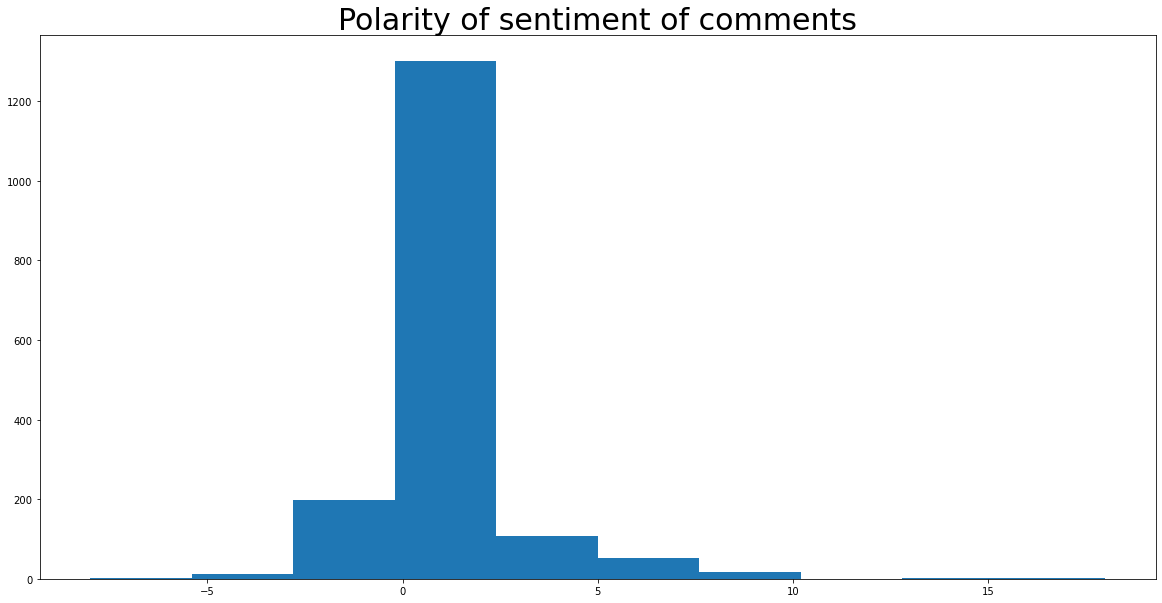

In [23]:
plt.hist(df['polarity_CanDoBetter'])
plt.title('Polarity of sentiment of comments', fontsize=30)

### Before we can extract the information we must partition the data into train and test packages. This is because in some cases the extraction of information involves all columns of the set and we should not extract information from the test columns. Instead, the test columns should use the extracted data, without influencing the conclusions drawn.

In [24]:
y = df.pop('Status').to_frame()
y

,Status
0,True
1,True
2,False
3,False
4,False
...,...
1712,False
1713,False
1714,False
1715,False


In [25]:
x = df

In [26]:
particion = 0.10

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=particion, random_state=random_state)

In [27]:
y_train = pd.DataFrame(y_train, columns = y.columns)
y_train.head()

,Status
680,True
117,True
1565,False
945,True
53,True


In [28]:
X_test = pd.DataFrame(X_test, columns = x.columns)
X_test.head()

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,...,PositionType_Clerical Staff/Office Services,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter
1103,facil,True,71329.90000,True,7.007708,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,0
2,safeti meet discus need done day start keep op...,True,60724.12250,True,17.152659,True,True,True,False,True,...,False,False,False,True,False,False,False,False,True,0
1472,facil,True,49769.59506,False,17.482517,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,0
1446,offer flexibl schedul depart,True,78894.20000,False,50.000000,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,0
69,pay,True,70000.00000,False,25.445293,True,True,True,False,True,...,False,True,False,False,False,False,False,False,True,-2


In [29]:
y_test = pd.DataFrame(y_test, columns = y.columns)
y_test.head()

,Status
1103,False
2,False
1472,True
1446,False
69,False


In [30]:
train_partition = X_train.join(y_train)
train_partition.head()

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,...,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,Status
680,better insur annual review,True,75004.50000,False,3.770739,False,False,True,False,True,...,False,False,False,True,False,False,False,True,3,True
117,social event,True,28679.46715,True,11.682243,True,True,False,True,False,...,False,True,False,False,True,False,False,False,0,True
1565,facil,False,54968.16924,False,6.743088,False,True,False,True,False,...,False,True,False,False,False,False,False,True,0,False
945,pension,False,83287.00000,False,3.373819,False,True,False,False,True,...,False,False,False,True,False,False,True,False,0,True
53,pension rais,False,73228.30000,False,4.450378,True,False,False,True,False,...,False,False,False,True,False,False,False,True,0,True


In [31]:
test_partition = X_test.join(y_test)
test_partition.head()

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,...,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,Status
1103,facil,True,71329.90000,True,7.007708,False,False,True,True,False,...,False,True,False,False,False,False,False,True,0,False
2,safeti meet discus need done day start keep op...,True,60724.12250,True,17.152659,True,True,True,False,True,...,False,False,True,False,False,False,False,True,0,False
1472,facil,True,49769.59506,False,17.482517,False,True,False,False,True,...,False,True,False,False,True,False,False,False,0,True
1446,offer flexibl schedul depart,True,78894.20000,False,50.000000,False,True,False,False,True,...,False,True,False,False,False,False,True,False,0,False
69,pay,True,70000.00000,False,25.445293,True,True,True,False,True,...,True,False,False,False,False,False,False,True,-2,False


### In order to extract information directly related to our predictor variable, we are going to extract each of the texts and group them by our target. this way we have more words and we can analyse the frequency of certain words with a higher volume.

In [32]:
current_CanDoBetter = " ".join(list(train_partition['CanDoBetter'][train_partition['Status'] == True].dropna()))

current_tokens = word_tokenize(current_CanDoBetter)

current_freq = dict(nltk.FreqDist(current_tokens).most_common(20))
current_freq

{'pension': 174,
 'noth': 149,
 'pay': 133,
 'event': 75,
 'social': 71,
 'employe': 71,
 'better': 62,
 'listen': 31,
 'benefit': 29,
 'facil': 29,
 'time': 28,
 'compani': 28,
 'work': 24,
 'offer': 23,
 'rais': 22,
 'job': 20,
 'take': 19,
 'commun': 18,
 'good': 18,
 'action': 18}

In [33]:
def word_cloud_generator(text):
    #image = WordCloud(background_color='white', colormap='Set2', collocations=False,).generate(text)
    image = WordCloud(width=3000,
                      height=2000,
                      background_color='black',
                      colormap='magma',
                      collocations=False).generate(text)
    plt.figure(figsize=(40, 30))
    plt.axis("off")
    plt.imshow(image, interpolation='bilinear') 

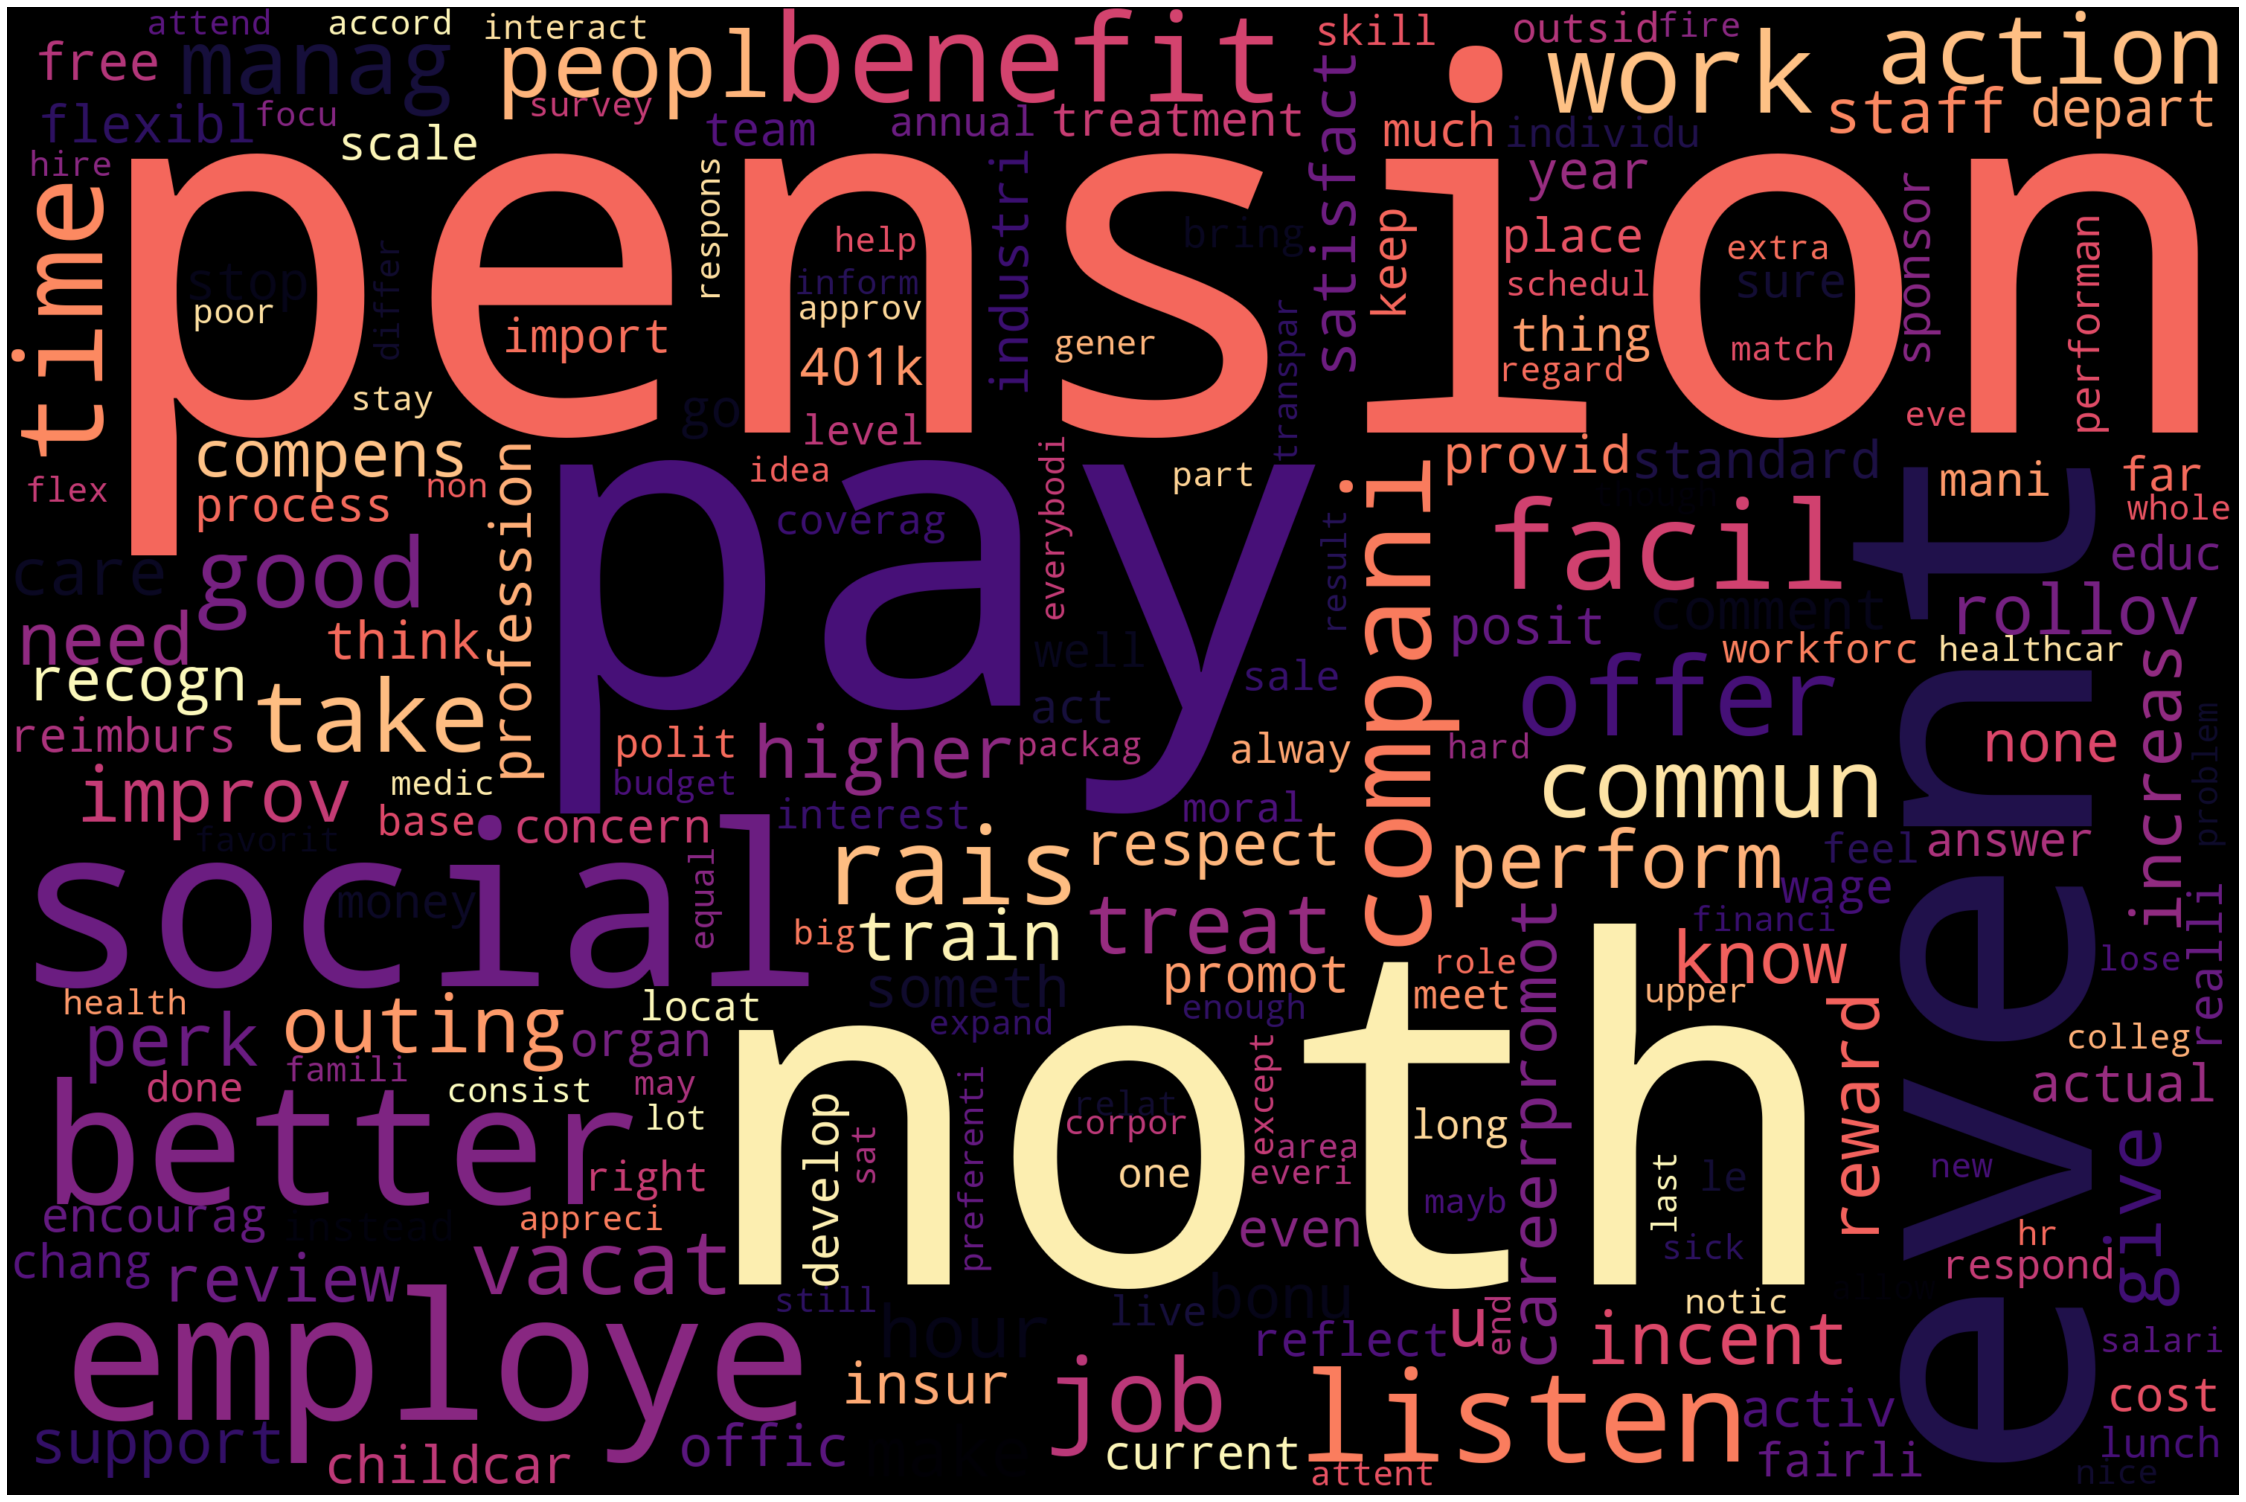

In [34]:
word_cloud_generator(current_CanDoBetter)

In [35]:
past_CanDoBetter = " ".join(list(train_partition['CanDoBetter'][train_partition['Status'] == False].dropna()))

past_tokens = word_tokenize(past_CanDoBetter)

past_freq = dict(nltk.FreqDist(past_tokens).most_common(20))
past_freq

{'facil': 244,
 'careerpromot': 108,
 'pay': 94,
 'better': 49,
 'employe': 48,
 'listen': 27,
 'compani': 26,
 'work': 23,
 'benefit': 21,
 'event': 18,
 'take': 16,
 'social': 16,
 'treat': 15,
 'action': 15,
 'incent': 15,
 'time': 15,
 'rais': 15,
 'offer': 14,
 'respect': 13,
 'get': 12}

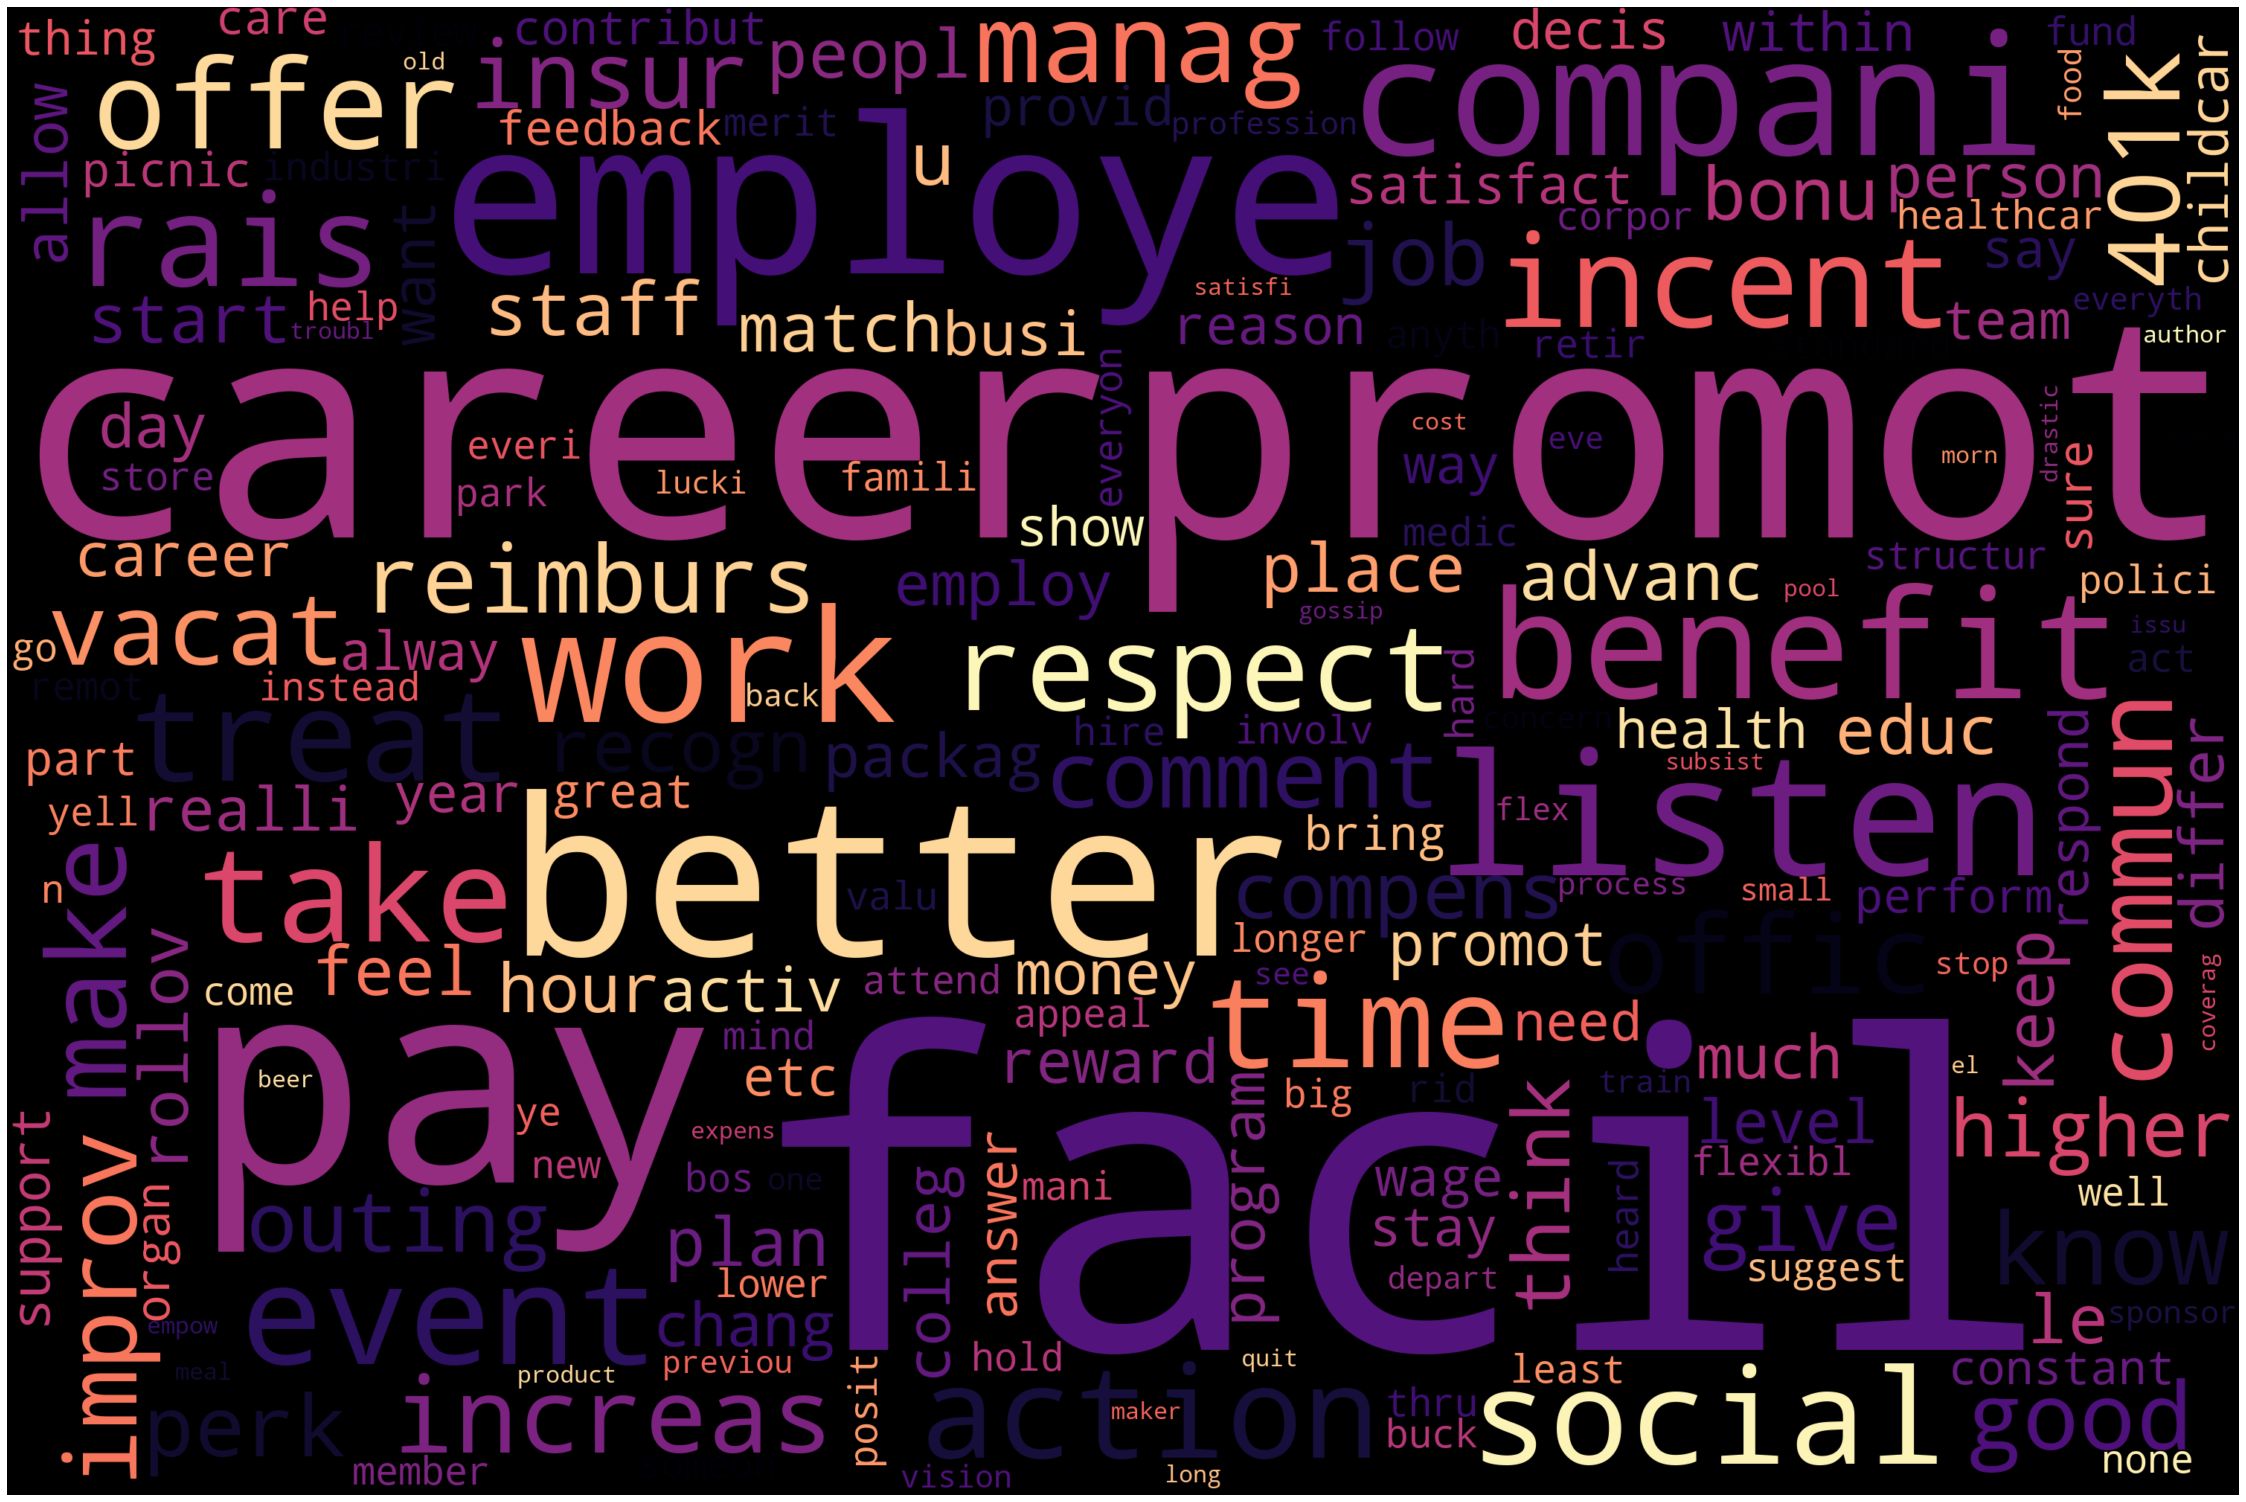

In [36]:
word_cloud_generator(past_CanDoBetter)

### Once we have the most frequent words in each category we will create a column depending on whether CanDoBetter contains one of the frequent words in its category.

In [37]:
registers_count = len(train_partition)
registers_count

1520

In [38]:
train_partition['true_freq_words'] = train_partition['CanDoBetter'].apply(
    lambda text: sum([(current_freq[word])/registers_count for word in text.split() if word in current_freq])
)

In [39]:
train_partition[['true_freq_words', 'CanDoBetter']]

,true_freq_words,CanDoBetter
680,0.040789,better insur annual review
117,0.096053,social event
1565,0.019079,facil
945,0.114474,pension
53,0.128947,pension rais
...,...,...
335,0.098026,noth
1313,0.096053,social event
1384,0.018421,compani outing
1132,0.114474,pension


In [40]:
train_partition['false_freq_words'] = train_partition['CanDoBetter'].apply(
    lambda text: sum([(past_freq[word])/registers_count for word in text.split() if word in past_freq])
)

In [41]:
train_partition[['false_freq_words', 'CanDoBetter']]

,false_freq_words,CanDoBetter
680,0.032237,better insur annual review
117,0.022368,social event
1565,0.160526,facil
945,0.000000,pension
53,0.009868,pension rais
...,...,...
335,0.000000,noth
1313,0.022368,social event
1384,0.017105,compani outing
1132,0.000000,pension


In [42]:
train_partition = train_partition.drop(columns=['CanDoBetter'])
train_partition.head()

,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,Facility_Facility C,...,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,Status,true_freq_words,false_freq_words
680,True,75004.50000,False,3.770739,False,False,True,False,True,False,...,False,True,False,False,False,True,3,True,0.040789,0.032237
117,True,28679.46715,True,11.682243,True,True,False,True,False,False,...,False,False,True,False,False,False,0,True,0.096053,0.022368
1565,False,54968.16924,False,6.743088,False,True,False,True,False,False,...,False,False,False,False,False,True,0,False,0.019079,0.160526
945,False,83287.00000,False,3.373819,False,True,False,False,True,False,...,False,True,False,False,True,False,0,True,0.114474,0.000000
53,False,73228.30000,False,4.450378,True,False,False,True,False,False,...,False,True,False,False,False,True,0,True,0.128947,0.009868


In [43]:
y_train = train_partition.pop('Status').to_frame()
y_train

,Status
680,True
117,True
1565,False
945,True
53,True
...,...
335,True
1313,False
1384,False
1132,True


In [44]:
X_train = train_partition

### We create the frequency column for the test data.

In [45]:
test_partition['true_freq_words'] = test_partition['CanDoBetter'].apply(
    lambda text: sum([(current_freq[word])/registers_count for word in text.split() if word in current_freq])
)

In [46]:
test_partition[['true_freq_words', 'CanDoBetter']][test_partition['Status'] == True]

,true_freq_words,CanDoBetter
1472,0.019079,facil
795,0.018421,improv compani match 401k
38,0.052632,could commun better let u know go decis made l...
1617,0.059868,better perk benefit
806,0.098026,noth
...,...,...
765,0.098026,noth
985,0.114474,pension
1652,0.015789,flexibl work hour
70,0.098026,noth


In [47]:
test_partition['false_freq_words'] = test_partition['CanDoBetter'].apply(
    lambda text: sum([(past_freq[word])/registers_count for word in text.split() if word in past_freq])
)

In [48]:
test_partition[['false_freq_words', 'CanDoBetter']][test_partition['Status'] == False]

,false_freq_words,CanDoBetter
1103,0.160526,facil
2,0.031579,safeti meet discus need done day start keep op...
1446,0.009211,offer flexibl schedul depart
69,0.061842,pay
616,0.160526,facil
...,...,...
447,0.071053,careerpromot
649,0.160526,facil
1016,0.000000,yearli revu
696,0.160526,facil


In [49]:
test_partition

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,...,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,Status,true_freq_words,false_freq_words
1103,facil,True,71329.90000,True,7.007708,False,False,True,True,False,...,False,False,False,False,False,True,0,False,0.019079,0.160526
2,safeti meet discus need done day start keep op...,True,60724.12250,True,17.152659,True,True,True,False,True,...,True,False,False,False,False,True,0,False,0.059868,0.031579
1472,facil,True,49769.59506,False,17.482517,False,True,False,False,True,...,False,False,True,False,False,False,0,True,0.019079,0.160526
1446,offer flexibl schedul depart,True,78894.20000,False,50.000000,False,True,False,False,True,...,False,False,False,False,True,False,0,False,0.015132,0.009211
69,pay,True,70000.00000,False,25.445293,True,True,True,False,True,...,False,False,False,False,False,True,-2,False,0.087500,0.061842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,facil,False,50423.98416,False,6.101281,False,True,False,True,False,...,False,True,False,False,True,False,0,False,0.019079,0.160526
1016,yearli revu,False,83287.00000,True,16.447368,False,True,False,False,True,...,False,False,False,False,False,True,0,False,0.000000,0.000000
696,facil,True,67388.00000,False,20.876827,False,False,False,False,True,...,False,False,False,True,False,False,0,False,0.019079,0.160526
1677,facil,False,61276.06018,False,3.575259,False,False,False,True,False,...,False,False,False,True,False,False,0,False,0.019079,0.160526


In [50]:
test_partition = test_partition.drop(columns=['CanDoBetter'])
test_partition

,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,Facility_Facility C,...,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,Status,true_freq_words,false_freq_words
1103,True,71329.90000,True,7.007708,False,False,True,True,False,False,...,False,False,False,False,False,True,0,False,0.019079,0.160526
2,True,60724.12250,True,17.152659,True,True,True,False,True,False,...,True,False,False,False,False,True,0,False,0.059868,0.031579
1472,True,49769.59506,False,17.482517,False,True,False,False,True,False,...,False,False,True,False,False,False,0,True,0.019079,0.160526
1446,True,78894.20000,False,50.000000,False,True,False,False,True,False,...,False,False,False,False,True,False,0,False,0.015132,0.009211
69,True,70000.00000,False,25.445293,True,True,True,False,True,False,...,False,False,False,False,False,True,-2,False,0.087500,0.061842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,False,50423.98416,False,6.101281,False,True,False,True,False,False,...,False,True,False,False,True,False,0,False,0.019079,0.160526
1016,False,83287.00000,True,16.447368,False,True,False,False,True,False,...,False,False,False,False,False,True,0,False,0.000000,0.000000
696,True,67388.00000,False,20.876827,False,False,False,False,True,False,...,False,False,False,True,False,False,0,False,0.019079,0.160526
1677,False,61276.06018,False,3.575259,False,False,False,True,False,False,...,False,False,False,True,False,False,0,False,0.019079,0.160526


# Standardisation

In [51]:
y_test = test_partition.pop('Status').to_frame()
y_test

,Status
1103,False
2,False
1472,True
1446,False
69,False
...,...
649,False
1016,False
696,False
1677,False


In [52]:
x_test = test_partition

In [53]:
x_test = pd.DataFrame(
    StandardScaler().fit_transform(x_test), 
    columns = x_test.columns
)
x_test.head()

,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,Facility_Facility C,...,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,true_freq_words,false_freq_words
0,1.347838,-0.147487,1.479419,-0.260813,-0.406838,-1.005935,2.109885,1.218726,-1.203859,-0.077152,...,0.882580,-0.263857,-0.593296,-0.620682,-0.556846,-0.483298,1.542725,-0.118166,-0.726250,1.847736
1,1.347838,-0.819077,1.479419,0.038734,2.457980,0.994100,2.109885,-0.820529,0.830662,-0.077152,...,-1.133042,3.789939,-0.593296,-0.620682,-0.556846,-0.483298,1.542725,-0.118166,0.215305,-0.363805
2,1.347838,-1.512750,-0.675941,0.048473,-0.406838,0.994100,-0.473960,-0.820529,0.830662,-0.077152,...,0.882580,-0.263857,-0.593296,1.611131,-0.556846,-0.483298,-0.648204,-0.118166,-0.726250,1.847736
3,1.347838,0.331507,-0.675941,1.008605,-0.406838,0.994100,-0.473960,-0.820529,0.830662,-0.077152,...,0.882580,-0.263857,-0.593296,-0.620682,-0.556846,2.069118,-0.648204,-0.118166,-0.817368,-0.747440
4,1.347838,-0.231700,-0.675941,0.283587,2.457980,0.994100,2.109885,-0.820529,0.830662,-0.077152,...,-1.133042,-0.263857,-0.593296,-0.620682,-0.556846,-0.483298,1.542725,-1.366291,0.853133,0.155230


In [54]:
X_train = pd.DataFrame(
    StandardScaler().fit_transform(X_train), 
    columns = X_train.columns
)
X_train.head()

,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Facility_Facility A,Facility_Facility B,Facility_Facility C,...,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree,polarity_CanDoBetter,true_freq_words,false_freq_words
0,1.380692,0.004147,-0.743374,-0.366726,-0.445801,-0.953702,2.161398,-0.815378,0.839068,-0.118361,...,-1.221394,-0.214736,1.725995,-0.586467,-0.622999,-0.538816,1.782084,1.507676,-0.325881,-0.364760
1,1.380692,-2.775663,1.345218,-0.112604,2.243155,1.048545,-0.462663,1.226425,-1.191798,-0.118361,...,0.818737,-0.214736,-0.579376,1.705126,-0.622999,-0.538816,-0.561141,-0.141401,0.811957,-0.533125
2,-0.724275,-1.198166,-0.743374,-0.271252,-0.445801,1.048545,-0.462663,1.226425,-1.191798,-0.118361,...,0.818737,-0.214736,-0.579376,-0.586467,-0.622999,-0.538816,1.782084,-0.141401,-0.772888,1.823979
3,-0.724275,0.501153,-0.743374,-0.379475,-0.445801,1.048545,-0.462663,-0.815378,0.839068,-0.118361,...,-1.221394,-0.214736,1.725995,-0.586467,-0.622999,1.855921,-0.561141,-0.141401,1.191236,-0.914751
4,-0.724275,-0.102436,-0.743374,-0.344896,2.243155,-0.953702,-0.462663,1.226425,-1.191798,-0.118361,...,-1.221394,-0.214736,1.725995,-0.586467,-0.622999,-0.538816,1.782084,-0.141401,1.489241,-0.746387


# DECISION TREE MODEL

In [55]:
tree_results_df = pd.DataFrame(columns=['depth', 'criterion_type', 'splitter_type', 'max_features_type', 'train_score', 'test_score'])
tree_results_df.head()

,depth,criterion_type,splitter_type,max_features_type,train_score,test_score


In [56]:
depths = range(1,20)
criterion_types = ['gini', 'entropy']
splitter_types = ['best', 'random']
max_features_types = ['auto', 'sqrt', 'log2']

for depth in depths:
    for criterion_type in criterion_types:
        for splitter_type in splitter_types:
            for max_features_type in max_features_types:
                dec_tree = tree.DecisionTreeClassifier(
                    random_state = random_state, 
                    criterion = criterion_type,
                    splitter = splitter_type,
                    max_features = max_features_type,
                    max_depth = depth
                ).fit(X_train, y_train)

                res_temp = pd.DataFrame([[
                    depth, 
                    criterion_type,
                    splitter_type, 
                    max_features_type, 
                    dec_tree.score(X_train, y_train),
                    dec_tree.score(x_test, y_test)
                ]], columns=['depth', 'criterion_type', 'splitter_type', 'max_features_type', 'train_score', 'test_score'])

                tree_results_df = tree_results_df.append(res_temp)

tree_results_df = tree_results_df.reset_index(drop=True)

In [57]:
tree_results_df = tree_results_df.sort_values(by='test_score', ascending=False)
tree_results_df.head(10)

,depth,criterion_type,splitter_type,max_features_type,train_score,test_score
126,11,entropy,best,auto,0.927632,0.810651
127,11,entropy,best,sqrt,0.927632,0.810651
72,7,gini,best,auto,0.826974,0.798817
73,7,gini,best,sqrt,0.826974,0.798817
210,18,entropy,best,auto,0.998684,0.798817
211,18,entropy,best,sqrt,0.998684,0.798817
154,13,entropy,random,sqrt,0.965789,0.792899
115,10,entropy,best,sqrt,0.890132,0.792899
206,18,gini,best,log2,0.998684,0.792899
153,13,entropy,random,auto,0.965789,0.792899


In [58]:
optimal_tree_config = tree_results_df.iloc[0]
optimal_tree_config

depth                      11
criterion_type        entropy
splitter_type            best
max_features_type        auto
train_score          0.927632
test_score           0.810651
Name: 126, dtype: object

In [59]:
dec_tree_opt = tree.DecisionTreeClassifier(
                        random_state=random_state, 
                        criterion = optimal_tree_config[1],
                        splitter = optimal_tree_config[2],
                        max_features = optimal_tree_config[3],
                        max_depth = optimal_tree_config[0]
                    )
dec_tree_opt = dec_tree_opt.fit(X_train, y_train)
y_pred = dec_tree_opt.predict(x_test)

dec_tree_opt.score(x_test, y_test)

0.8106508875739645

In [60]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.82      0.76      0.79        78
        True       0.80      0.86      0.83        91

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169



AUC score: 0.8067765567765568


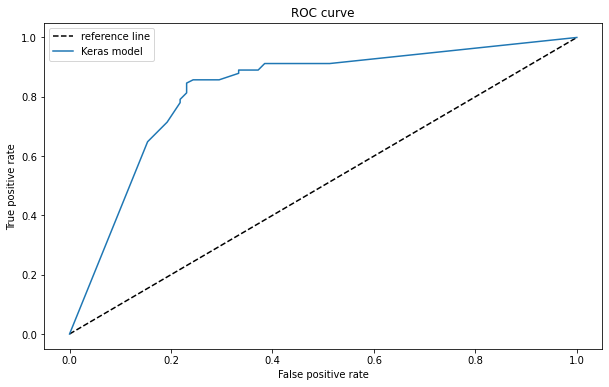

In [61]:
y_pred_prob = dec_tree_opt.predict_proba(x_test)  #probabilities for every prediction

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
AUC_score = roc_auc_score(y_test, y_pred)
print('AUC score:', AUC_score)

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--', label='reference line')
plt.plot(fpr, tpr, label='Keras model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()